In [267]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


# Riyadh districts analysis

In [268]:
# import os
# os._exit(00)

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport 
from matplotlib import style
import warnings

In [270]:
warnings.filterwarnings('ignore')

In [271]:
plt.style.use('fast')

In [272]:
df = pd.read_csv('riyadh_districts.csv')
districts_names = df[['District_name_EN','District_name_AR']]

In [273]:
df.head()

,District_name_EN,District_name_AR,latitude,longitude,Population,Males_(%),Females_(%),Saudis_(%),Non_Saudis_(%),Males,Females,Saudis,Non_Saudis,Average_Income
0,Ad Dar Al Baida,دار البيضاء,24.566842,46.790295,168900,0.56,0.44,0.84,0.16,93908,74992,142214,26686,6900
1,Ad Dhubbat,الضباط,24.679383,46.721847,20400,0.58,0.42,0.15,0.86,11812,8588,2958,17442,8200
2,Ad Dirah,الديرة,24.573161,46.847922,13100,0.81,0.19,0.16,0.84,10637,2463,2070,11030,2900
3,Ad Diriyah,الدرعية,24.748620,46.535380,11300,0.53,0.47,0.82,0.18,5955,5345,9255,2045,6900
4,Ad Duraihimiyah,الدريهمية,24.590332,46.695121,13700,0.56,0.45,0.59,0.41,7604,6097,8056,5644,10000


In [274]:
df.shape

(183, 14)

## Data Cleaning

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District_name_EN  183 non-null    object 
 1   District_name_AR  183 non-null    object 
 2   latitude          183 non-null    float64
 3   longitude         183 non-null    float64
 4   Population        183 non-null    int64  
 5   Males_(%)         183 non-null    float64
 6   Females_(%)       183 non-null    float64
 7   Saudis_(%)        183 non-null    float64
 8   Non_Saudis_(%)    183 non-null    float64
 9   Males             183 non-null    int64  
 10  Females           183 non-null    int64  
 11  Saudis            183 non-null    int64  
 12  Non_Saudis        183 non-null    int64  
 13  Average_Income    183 non-null    int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 20.1+ KB


### Check for null values

In [276]:
df[df.isnull()].sum()

District_name_EN      0
District_name_AR      0
latitude            0.0
longitude           0.0
Population          0.0
Males_(%)           0.0
Females_(%)         0.0
Saudis_(%)          0.0
Non_Saudis_(%)      0.0
Males               0.0
Females             0.0
Saudis              0.0
Non_Saudis          0.0
Average_Income      0.0
dtype: object

### Display information about the dataset

In [277]:
df.describe()

,latitude,longitude,Population,Males_(%),Females_(%),Saudis_(%),Non_Saudis_(%),Males,Females,Saudis,Non_Saudis,Average_Income
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,24.700702,46.674706,33052.284153,0.490109,0.379836,0.517432,0.352077,18432.125683,14620.245902,21856.010929,11196.322404,6387.978142
std,0.108449,0.113989,37800.382964,0.211860,0.174225,0.337780,0.303724,21461.730994,16833.114697,30045.819057,14381.849601,4751.109501
min,24.438205,46.274751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.623791,46.621998,5160.000000,0.490000,0.365000,0.165000,0.125000,3120.000000,1887.500000,1585.500000,1499.000000,2700.000000
50%,24.691151,46.689393,19700.000000,0.530000,0.450000,0.630000,0.260000,11997.000000,8327.000000,9764.000000,5670.000000,7300.000000
75%,24.769849,46.733061,43500.000000,0.590000,0.490000,0.800000,0.555000,27131.500000,20937.500000,27371.000000,15492.500000,9200.000000
max,25.028670,46.968014,189900.000000,1.000000,0.620000,1.000000,1.000000,109396.000000,87354.000000,179835.000000,84845.000000,33700.000000


> Some entries are 0, in income it means unavailable. If the whole row is 0 it means data is unavailable. In other fields it means actual 0% or 0.

### Districts with unavailable information

In [278]:
# Showing the datapoints of districts which we don't have information about
df[df['Population']==0]

,District_name_EN,District_name_AR,latitude,longitude,Population,Males_(%),Females_(%),Saudis_(%),Non_Saudis_(%),Males,Females,Saudis,Non_Saudis,Average_Income
35,Al Malqa - Ad Diriyah,الملقاه - الدرعية,24.817250,46.544316,0,0.0,0.0,0.0,0.0,0,0,0,0,0
52,Al Qari,القرى,24.628658,46.714833,0,0.0,0.0,0.0,0.0,0,0,0,0,0
58,Al Salmaniya - Ad Diriyah,السلمانية - الدرعية,24.787175,46.562234,0,0.0,0.0,0.0,0.0,0,0,0,0,0
63,Al Thlema - Ad Diriyah,الثليما - الدرعية,24.762498,46.558940,0,0.0,0.0,0.0,0.0,0,0,0,0,0
64,Al Traif - Ad Diriyah,الطريف - الدرعية,24.738327,46.568820,0,0.0,0.0,0.0,0.0,0,0,0,0,0
68,Al Uyaynah & Al Jubaylah,العيينة والجبيلة,24.863214,46.397925,0,0.0,0.0,0.0,0.0,0,0,0,0,0
102,Ash Shamal,الشمال,25.028670,46.846397,0,0.0,0.0,0.0,0.0,0,0,0,0,0
103,Ash Sharq,الشرق,24.873552,46.848662,0,0.0,0.0,0.0,0.0,0,0,0,0,0
109,Banban,بنبان,24.979926,46.563881,0,0.0,0.0,0.0,0.0,0,0,0,0,0
117,East Al Jubaylah,الجبيلة الشرقية,24.920644,46.453885,0,0.0,0.0,0.0,0.0,0,0,0,0,0


### Drop the districts with unavailable information

In [279]:
df = df[df['Population']!=0]
df = df[df['Average_Income']!=0] 
df.shape

(147, 14)


## Data Visualization

### Correlation between the percentage of males and females and the average income

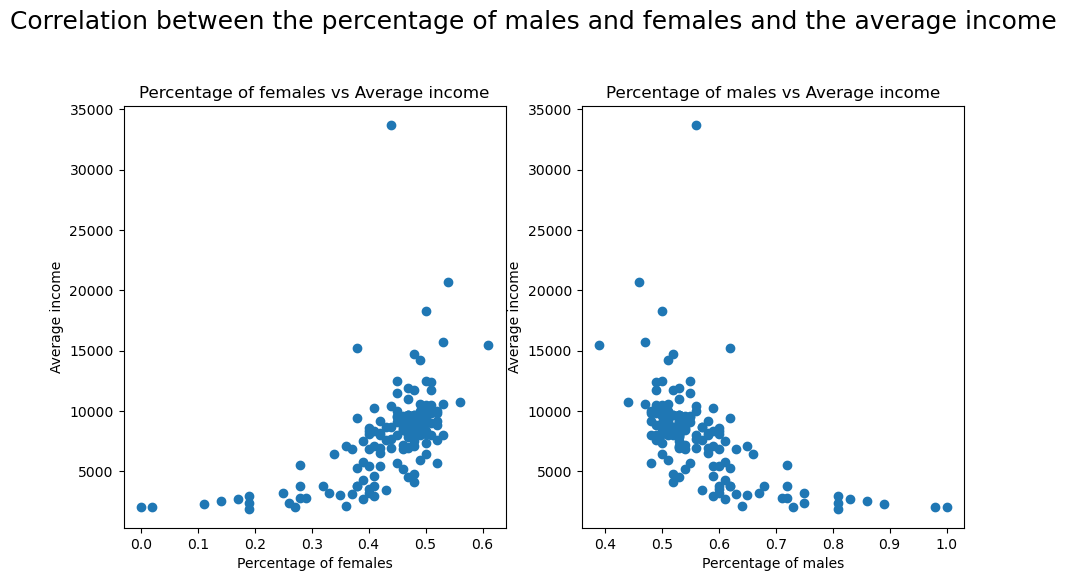

In [280]:
plt.subplots(figsize=(9,5))
plt.suptitle('Correlation between the percentage of males and females and the average income',fontsize = 18,y=1.1)
plt.tight_layout(pad=0.6)

#First
plt.subplot(1,2,1)
plt.scatter(df['Females_(%)'],df['Average_Income'])
plt.title('Percentage of females vs Average income')
plt.xlabel('Percentage of females')
plt.ylabel('Average income')

#Second
plt.subplot(1,2,2)
plt.scatter(df['Males_(%)'],df['Average_Income'])
plt.title('Percentage of males vs Average income')
plt.xlabel('Percentage of males')
plt.ylabel('Average income')

plt.show()

![alt text](1.png)

### Correlation between the percentage of Saudis and Non-saudis and the average income

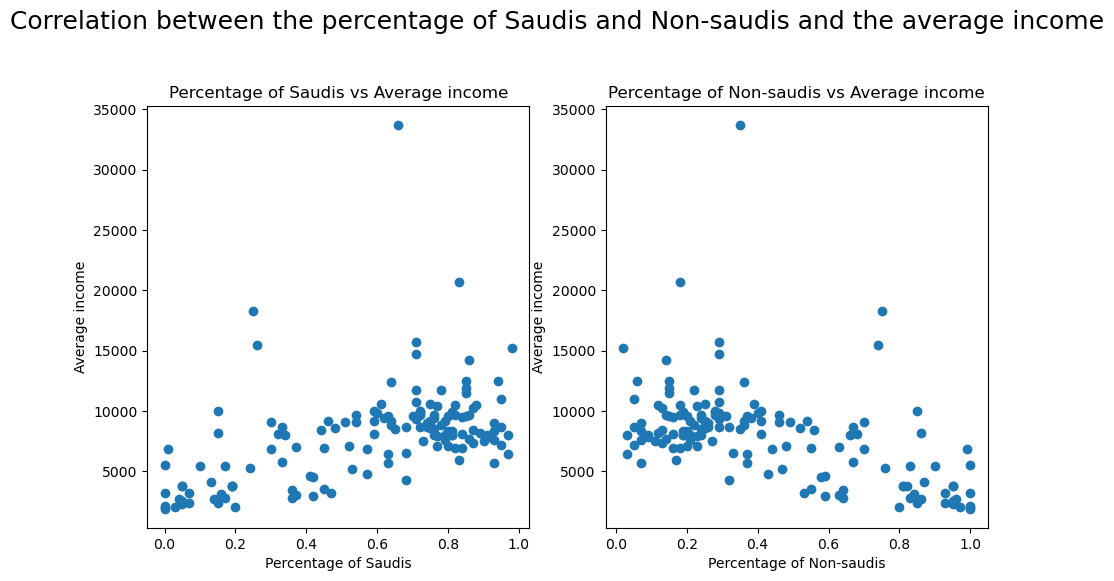

In [281]:
plt.subplots(figsize=(9,5))
plt.suptitle('Correlation between the percentage of Saudis and Non-saudis and the average income',\
             fontsize = 18,y=1.1)
plt.tight_layout(pad=0.6)

#First
plt.subplot(1,2,1)
plt.scatter(df['Saudis_(%)'],df['Average_Income'])
plt.title('Percentage of Saudis vs Average income')
plt.xlabel('Percentage of Saudis')
plt.ylabel('Average income')

#Second
plt.subplot(1,2,2)
plt.scatter(df['Non_Saudis_(%)'],df['Average_Income'])
plt.title('Percentage of Non-saudis vs Average income')
plt.xlabel('Percentage of Non-saudis')
plt.ylabel('Average income')

plt.show()

![alt text](2.png)

### Heat map of the correlation between the numeric columns

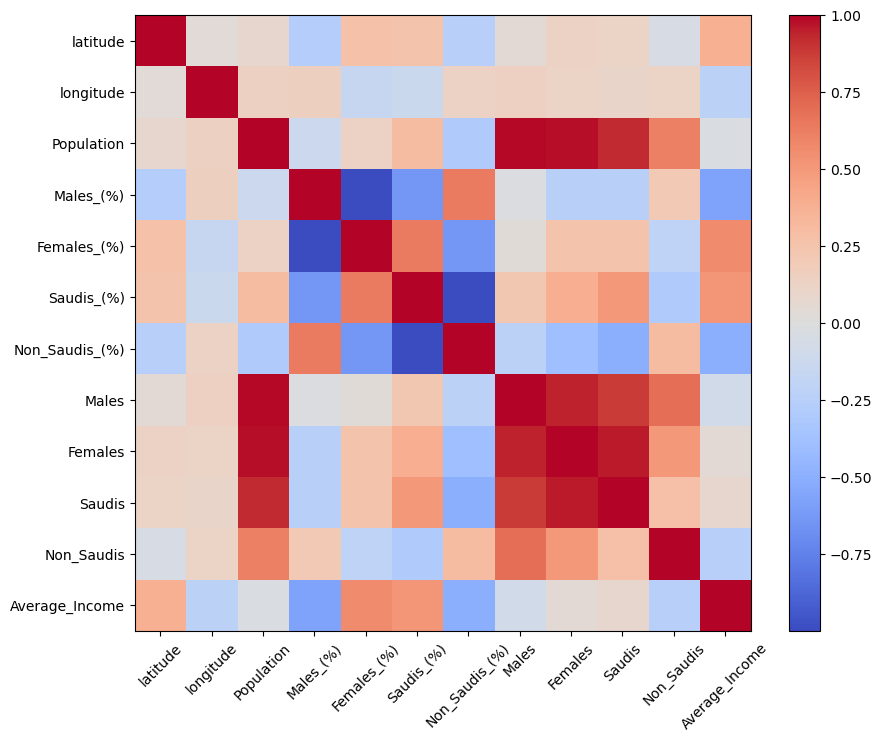

In [298]:
corr = df.corr()
plt.figure(figsize=(10,8))
plt.imshow(corr,cmap='coolwarm')

# Add labels and formatting
plt.colorbar()
tick_marks = [i for i in range(len(corr))]
plt.xticks(tick_marks, corr.columns, rotation=45)
plt.yticks(tick_marks, corr.columns)
plt.show()


![alt text](3.png)

### The location on the map of the top 6 districts based on average income

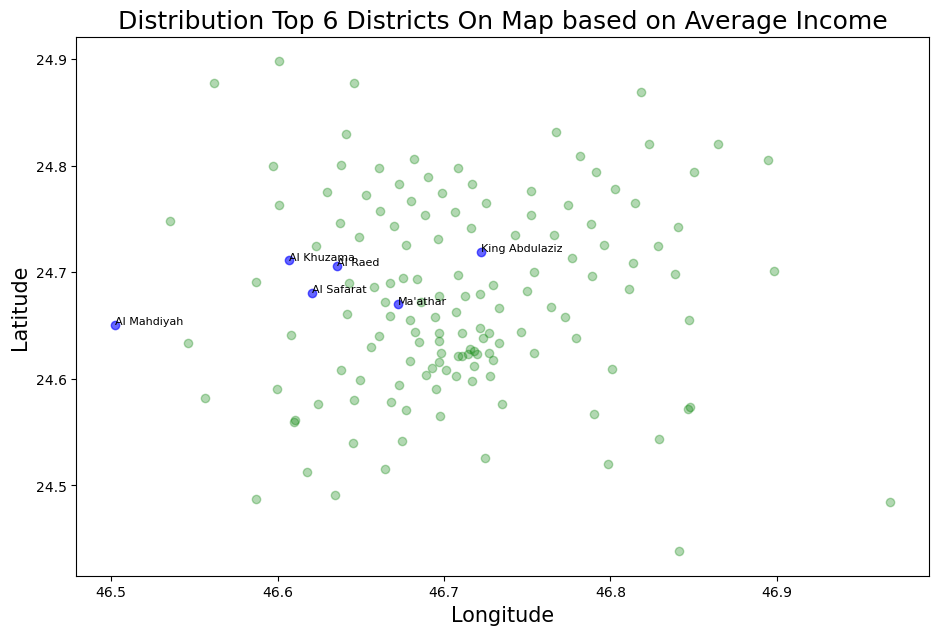

In [299]:
top_Dist = df.sort_values(by='Average_Income',ascending = False).head(6)
x = df['longitude'].values
y = df['latitude'].values

top_names= top_Dist['District_name_EN'].values

plt.figure(figsize=(11,7))
for i,name in enumerate(df['District_name_EN']):
    if name in top_names:
        plt.scatter(x[i],y[i], alpha=0.6, color='b')
        plt.text(x[i],y[i], name, fontsize=8)
    else:
        plt.scatter(x[i],y[i], alpha=0.3, color='g')   
plt.title("Distribution Top 6 Districts On Map based on Average Income", fontsize=18)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()

![alt text](4.png)

### What is the distribution of the average income in Riyadh districts

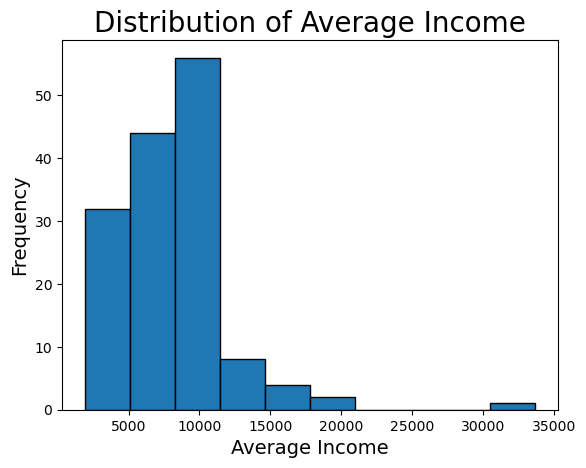

In [284]:
plt.hist(df['Average_Income'],edgecolor='black')

plt.xlabel('Average Income',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.title('Distribution of Average Income',fontsize=20)
plt.show()

![alt text](5.png)

### Is there relation between average Income and population distribution on districts ?

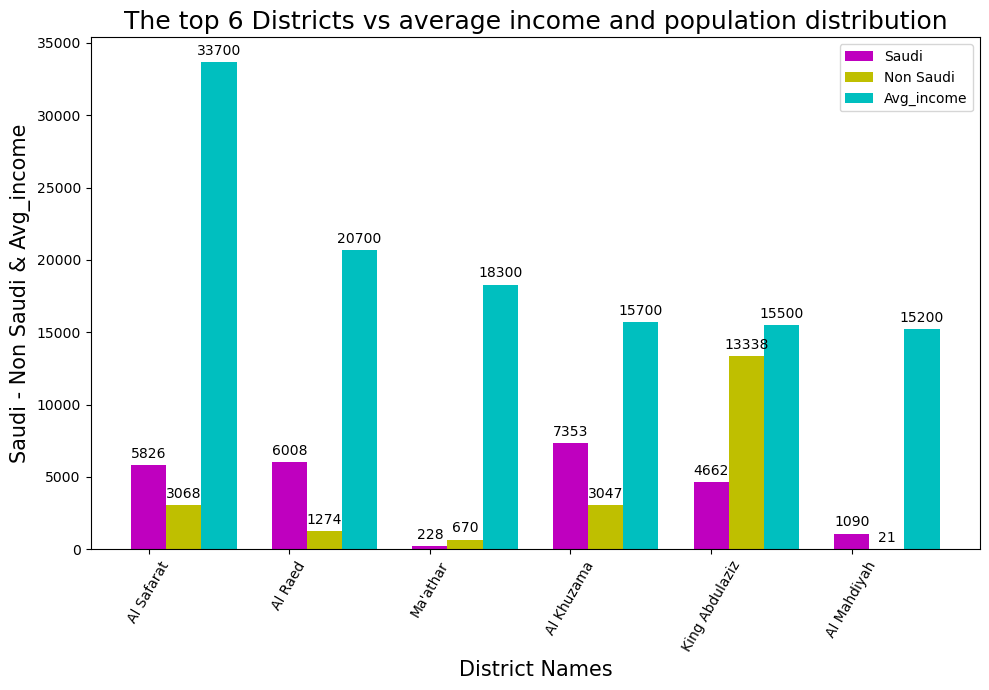

In [285]:
top_Dist = df.sort_values(by='Average_Income',ascending = False).head(6)

labels =    top_Dist['District_name_EN'].values.tolist()
Non_saudi = top_Dist['Non_Saudis']
saudi =     top_Dist['Saudis']
Avg_income= top_Dist['Average_Income']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots( )
fig.set_size_inches(10,7)
rects1 = ax.bar(x + 0.0, saudi, width, label='Saudi', color='m')
rects2 = ax.bar(x + 0.25, Non_saudi, width, label='Non Saudi', color='y')
rects3 = ax.bar(x + 0.50, Avg_income, width, label='Avg_income', color='c')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('District Names', fontsize=15)
ax.set_ylabel('Saudi - Non Saudi & Avg_income', fontsize=15)
ax.set_title('The top 6 Districts vs average income and population distribution', fontsize=18)
ax.set_xticks(x, labels, rotation=60)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()

![alt text](6.png)

### The number of females and males of the top 6 districts based on population

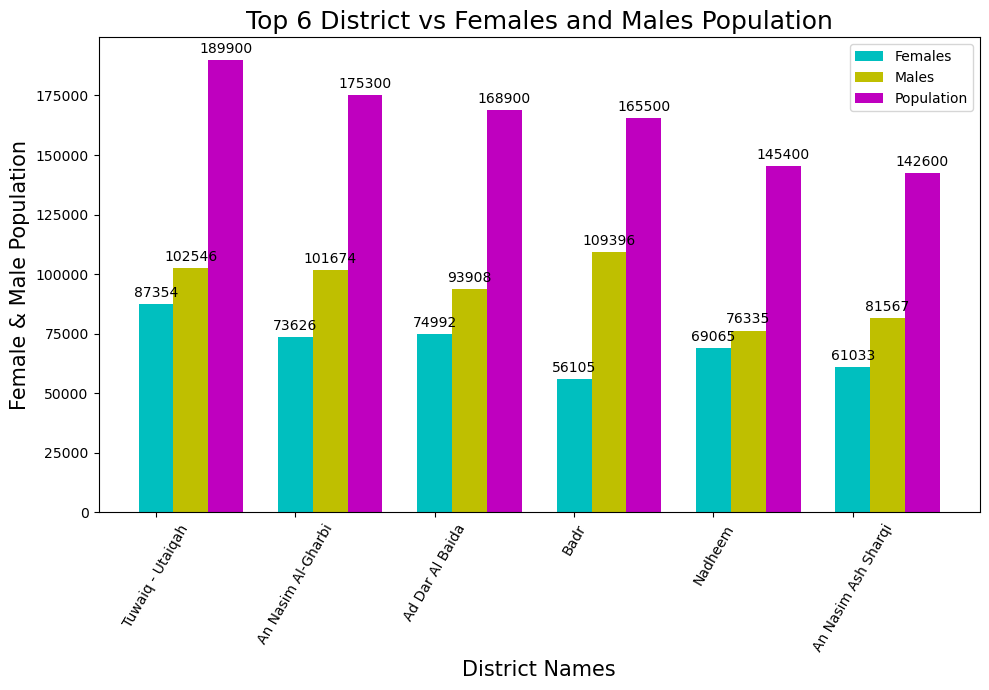

In [286]:
top_Dist = df.sort_values(by='Population',ascending = False).head(6)

labels = top_Dist['District_name_EN'].values.tolist()
females = top_Dist['Females']
males = top_Dist['Males']
population = top_Dist['Population']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots( )
fig.set_size_inches(10,7)
rects1 = ax.bar(x + 0.0, females, width, label='Females', color='c')
rects2 = ax.bar(x + 0.25, males, width, label='Males', color='y')
rects3 = ax.bar(x + 0.50, population, width, label='Population', color='m')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Female & Male Population',fontsize=15)
ax.set_xlabel('District Names', fontsize=15)
ax.set_title('Top 6 District vs Females and Males Population', fontsize=18)
ax.set_xticks(x, labels, rotation=60)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()

![alt text](7.png)

### The number of saudis and non-saudis population of the top 6 districts

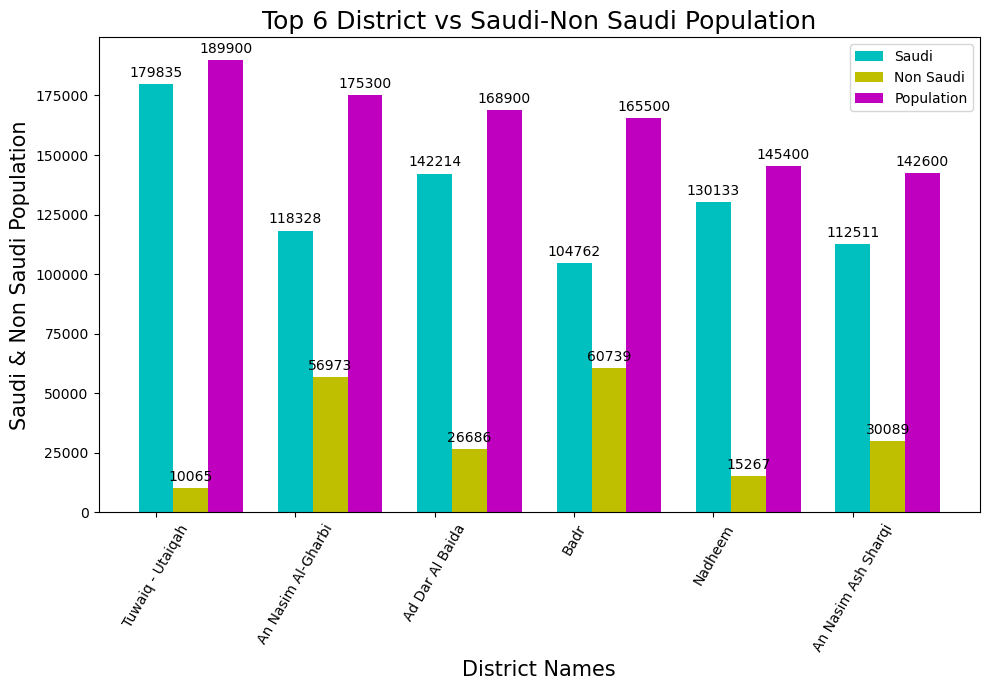

In [287]:
top_Dist = df.sort_values(by='Population',ascending = False).head(6)

labels = top_Dist['District_name_EN'].values.tolist()
Non_saudi = top_Dist['Non_Saudis']
saudi = top_Dist['Saudis']
population = top_Dist['Population']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots( )
fig.set_size_inches(10,7)
rects1 = ax.bar(x + 0.0, saudi, width, label='Saudi', color='c')
rects2 = ax.bar(x + 0.25, Non_saudi, width, label='Non Saudi', color='y')
rects3 = ax.bar(x + 0.50, population, width, label='Population', color='m')

# Add some text for labels, title and custom x-axis tick labels
ax.set_ylabel('Saudi & Non Saudi Population',fontsize=15)
ax.set_xlabel('District Names', fontsize=15)
ax.set_title('Top 6 District vs Saudi-Non Saudi Population', fontsize=18)
ax.set_xticks(x, labels, rotation=60)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()

![alt text](8.png)

### How many population in Northren of Riyadh ?

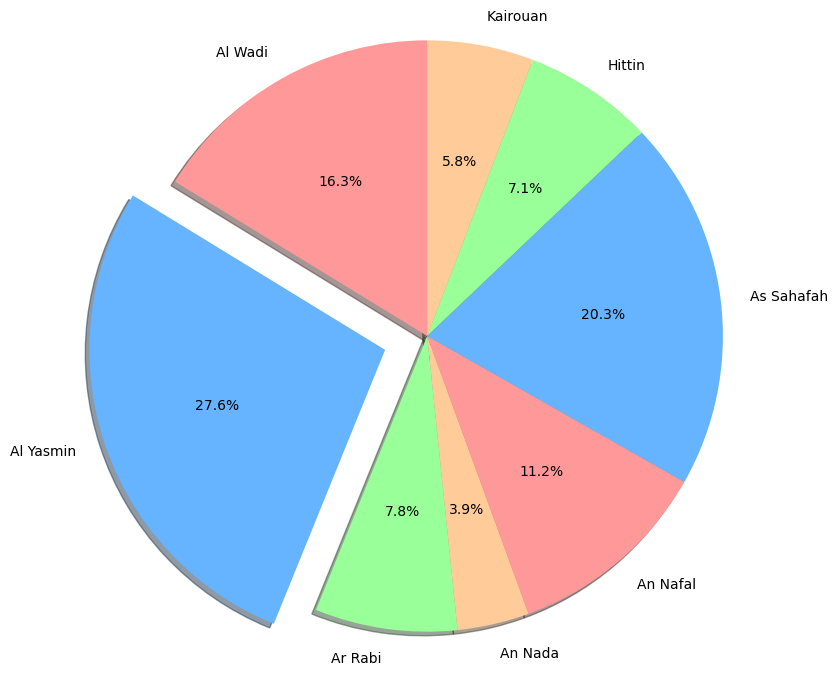

In [288]:
District_name = ['Al Wadi','Al Yasmin','Ar Rabi','An Nada','An Nafal','As Sahafah','Hittin','Kairouan']
Population =    [ 30906,52478,14790,7473,21319,38608,13491,11054]

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(Population,labels=District_name, autopct='%1.1f%%', colors =colors,  startangle=90, radius=2, explode = [0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0], shadow=True)
plt.show()

![alt text](9.png)

### Number of districts that doesn't start with AL

In [289]:
districts_Al = districts_names[districts_names.District_name_EN.str.startswith('A')]
districts_other = districts_names.drop(districts_Al.index)

In [290]:
districts_other

,District_name_EN,District_name_AR
108,Badr,بدر
109,Banban,بنبان
110,Central Al Jubaylah,الجبيلة الوسطى
111,Central Al Uyaynah,العيينة الوسطى
112,Dahiat Namar,ضاحية نمار
...,...,...
178,Utaiqah,عتيقة
179,West Ad Diriyah,الدرعية الغربية
180,West Al Jubaylah,الجبيلة الغربية
181,West Al Uyaynah,العيينة الغربية


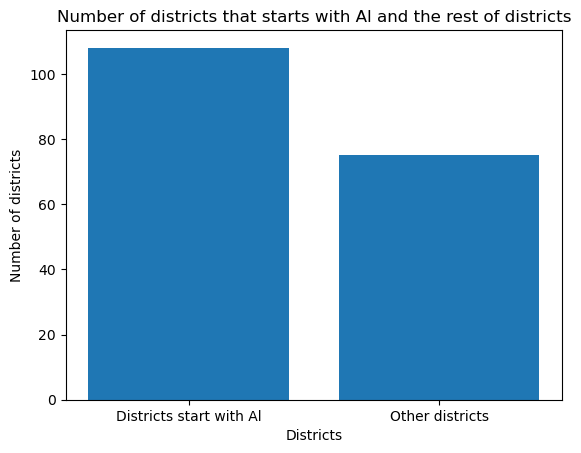

In [291]:
plt.bar(['Districts start with Al','Other districts'],[len(districts_Al),len(districts_other)])
plt.title('Number of districts that starts with Al and the rest of districts')
plt.xlabel('Districts')
plt.ylabel('Number of districts')
plt.show()

![alt text](10.png)